In [156]:
import sys
sys.path.append('..')

from dataset import ModisDataset
import pandas as pd
import geopandas as gpd
#!pip install contextily
import contextily as ctx
import matplotlib.pyplot as plt
import os
import torch
from model import Model, restore

tumblack = "#000000"
tumblue = "#0065bd"
tumorange = "#e37222"
tumbluelight = "#64a0c8"
tumgray = "#999999"
tumlightgray = "#dad7cb"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import numpy as np
def get_idx(df, fid):
    return np.where(test.index == fid)[0]

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

def load_gdf(fold, region="germany"):
    dataset = ModisDataset(region=region,
                           fold=fold,
                           znormalize=False,
                           augment=False,
                           overwrite=False,
                           include_time=False,
                           filter_date=(None,None),
                           smooth=None)
    
    gdf = gpd.GeoDataFrame(dataset.meta, geometry=gpd.points_from_xy(dataset.meta.x, dataset.meta.y),crs=4326).to_crs(epsg=3857)
    gdf["fold"] = fold
    return gdf, dataset

def get_dataset(region):

    train, traindataset = load_gdf('train', region)
    validate, validatedataset = load_gdf('validate', region)
    test, testdataset = load_gdf('test', region)

    points = pd.concat([train,validate,test])
    return (train, validate, test), traindataset, validatedataset, testdataset

def plot_locations(dataset, zoom=9):
    (train, validate, test), traindataset, validatedataset, testdataset = dataset
    
    fix, ax = plt.subplots(figsize=(7,7))

    ax = train.plot(color=tumblue, ax=ax)
    ax = validate.plot(color=tumbluelight, ax=ax)
    ax = test.plot(color=tumorange, ax=ax)
    ax.legend(["train","validate","test"])

    url = "http://a.tile.stamen.com/terrain/tileZ/tileX/tileY.png"
    #url = "http://tiles.wmflabs.org/bw-mapnik/tileZ/tileX/tileY.png"
    #url = "https://mt1.google.com/vt/lyrs=m&x=tileX&y=tileY&z=tileZ"
    add_basemap(ax,zoom,url)
    ax.set_xlabel("Easting in "+str(points.crs["init"]))
    ax.set_ylabel("Northing in "+str(points.crs["init"]))

    #for idx, row in test.iterrows():
    #    ax.annotate(s=row.name, xy=(row.geometry.x,row.geometry.y),
    #                 horizontalalignment='center')

local dataset found at /tmp/germany.csv
loading cached dataset found at /tmp/germany.npz


/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


local dataset found at /tmp/germany.csv
loading cached dataset found at /tmp/germany.npz
local dataset found at /tmp/germany.csv
loading cached dataset found at /tmp/germany.npz


/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/contextily/tile.py:198: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


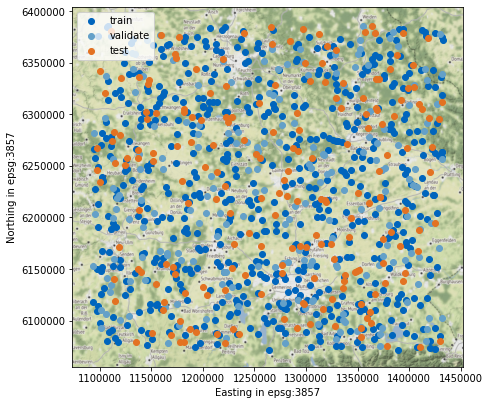

In [157]:
germany = get_dataset("germany")
plot_locations(germany)

In [165]:
germany[2][0]

(tensor([[ 0.5516],
         [ 0.5642],
         [ 0.6012],
         [ 0.7779],
         [ 0.8245],
         [ 0.8185],
         [ 0.8344],
         [ 0.6420],
         [ 0.7077],
         [ 0.2370],
         [ 0.7073],
         [ 0.6861],
         [ 0.8205],
         [ 0.8272],
         [ 0.6291],
         [ 0.6505],
         [ 0.7023],
         [ 0.6669],
         [ 0.0306],
         [ 0.6528],
         [ 0.5603],
         [ 0.5500],
         [ 0.4855],
         [ 0.4754],
         [ 0.3003],
         [ 0.6118],
         [ 0.7784],
         [ 0.7874],
         [ 0.7345],
         [ 0.8310],
         [ 0.7595],
         [ 0.6489],
         [ 0.6849],
         [ 0.7062],
         [ 0.6967],
         [ 0.7308],
         [ 0.7804],
         [ 0.8160],
         [ 0.6832],
         [ 0.7774],
         [ 0.7106],
         [ 0.5770],
         [-0.0724],
         [ 0.0186],
         [ 0.4881],
         [ 0.4908],
         [ 0.4832],
         [ 0.4720],
         [ 0.5648],
         [ 0.6276],


local dataset found at /tmp/canada.csv
loading cached dataset found at /tmp/canada.npz


/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


local dataset found at /tmp/canada.csv
loading cached dataset found at /tmp/canada.npz
local dataset found at /tmp/canada.csv
loading cached dataset found at /tmp/canada.npz


/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/contextily/tile.py:198: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


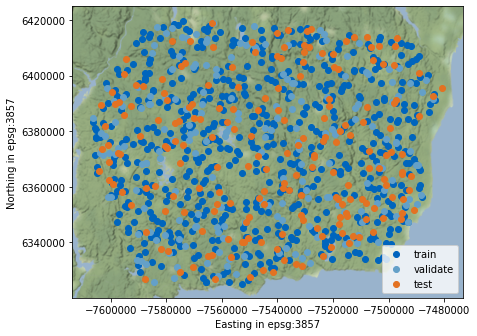

In [151]:
canada = get_dataset("canada")
plot_locations(canada)

local dataset found at /tmp/VolcanoPuyehue.csv
loading cached dataset found at /tmp/VolcanoPuyehue.npz


/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


local dataset found at /tmp/VolcanoPuyehue.csv
loading cached dataset found at /tmp/VolcanoPuyehue.npz
local dataset found at /tmp/VolcanoPuyehue.csv
loading cached dataset found at /tmp/VolcanoPuyehue.npz


/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/marc/miniconda3/envs/maml/lib/python3.6/site-packages/contextily/tile.py:198: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,


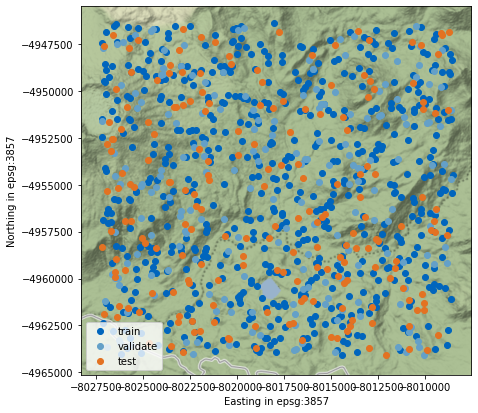

In [152]:
puyehoe = get_dataset("volcanopuyehue")
plot_locations(puyehoe, zoom=12)

In [153]:
(train, validate, test), traindataset, validatedataset, testdataset = puyehoe

In [154]:
x,y = traindataset[0]
x.shape

torch.Size([100, 1])

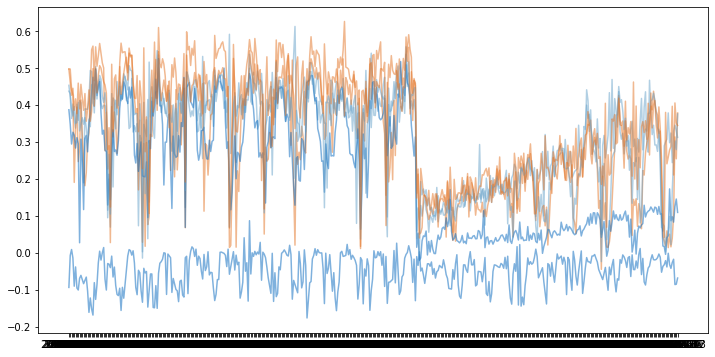

In [166]:
from datetime import datetime

alpha = .5
N = 2

fig, ax = plt.subplots(figsize=(12,6))
for i in range(N):
    ax.plot(traindataset.date[i].astype(datetime), traindataset.data[i], color=tumblue, alpha=alpha)
    ax.plot(validatedataset.date[i].astype(datetime), validatedataset.data[i], color=tumbluelight, alpha=alpha)
    ax.plot(testdataset.date[i].astype(datetime), testdataset.data[i], color=tumorange, alpha=alpha)


In [169]:
def ds2df(datasets, N=2):
    (train, validate, test), traindataset, validatedataset, testdataset = datasets
    dfs = list()
    for ds, name in zip([traindataset, validatedataset, testdataset], ["train", "val", "test"]):
        for i in range(N):
            df = pd.DataFrame([ds.date[i].astype(datetime), ds.data[i].reshape(-1)], index=["date",f"{name}{i}"]).T.set_index("date")
            df = df * 1e4 # rescale back to [0,10000]
            dfs.append(df)
    return pd.concat(dfs,axis=1)

In [170]:
# save time series samples for plotting 
ds2df(germany,N=20).to_csv("/tmp/germany.csv")
ds2df(canada,N=20).to_csv("/tmp/canada.csv")
ds2df(puyehoe,N=20).to_csv("/tmp/volcanopuyehue.csv")

,train0,train1,train2,train3,train4,train5,train6,train7,train8,train9,...,test10,test11,test12,test13,test14,test15,test16,test17,test18,test19
date,,,,,,,,,,,,,,,,,,,,,
2000-02-18,-0.415932,-0.318683,-0.366439,-0.272663,-0.763249,-0.488868,-1.07583,0.176678,0.598235,-0.160653,...,-0.32389,0.147651,-0.683347,-1.48851,0.253167,-0.0458691,-0.212244,-0.402699,0.144586,-0.34797
2000-03-05,-0.615639,-1.05717,-0.399,0.177547,-0.479317,-0.504498,-0.613902,0.227474,0.548742,0.327327,...,-0.483259,0.264551,0.223833,-0.993767,0.0263725,-0.198233,-0.389564,-0.241578,0.109998,-0.168023
2000-03-21,-0.240102,-0.223171,-0.878732,-0.665566,-1.02938,-0.753264,-0.0937949,0.231815,0.331235,0.360757,...,-0.307252,0.572782,-0.644818,-1.08177,0.452379,-0.296307,-0.392191,-0.638688,0.118316,0.448439
2000-04-06,0.486225,0.405039,-0.365571,0.548742,-0.188439,0.0698783,-0.192346,0.716323,0.395922,0.374649,...,0.627948,1.13145,-0.516096,-0.613732,0.813587,0.3473,0.742221,-0.208741,0.179175,0.438807
2000-04-22,0.73803,0.360757,-0.480619,-0.0121754,-0.277439,0.990269,0.647727,0.677249,0.208805,0.350771,...,0.61744,0.670418,-0.218811,0.208071,0.807458,0.350365,0.454568,-0.209179,0.736967,1.09424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-14,0.746713,0.593025,1.15003,1.1509,-0.374688,1.17348,1.08925,1.05669,0.629927,0.957708,...,-0.0393017,1.1008,0.382327,-0.453925,1.27987,1.09949,0.648526,1.28294,0.755794,0.816652
2019-09-30,0.609088,0.60822,0.0685759,0.878693,-0.433298,0.926449,0.858723,0.558293,0.490132,0.729347,...,-0.317323,1.02462,0.488719,-1.05287,1.14021,0.762362,0.863062,1.18574,0.423045,0.491784
2019-10-16,0.0520783,0.634703,0.387239,0.820518,-0.0451705,0.594327,0.382464,0.855684,0.576527,0.505761,...,0.0171781,0.894148,0.503605,-0.325203,1.11744,0.794761,0.788193,0.901153,0.78688,0.257984


In [117]:
traindataset.data[0].reshape(-1)

array([-1.74048952, -1.26105579, -1.17171687, -1.2982341 , -1.72217782,
       -1.43307484, -1.74992282, -1.77933253, -1.60509389, -1.55959207,
       -1.62201834, -1.68444461, -1.63672319, -1.58567238, -1.79708934,
       -2.11504712, -1.89919096, -2.06621591, -2.15610973, -1.6689074 ,
       -1.92027717, -1.69831711, -1.37037112, -1.19668738, -1.32986341,
       -1.21999318, -1.14175226, -1.61785659, -1.77988743, -1.38202403,
       -1.39201223, -1.44361794, -1.2704891 , -1.58456258, -1.43529444,
       -1.71163471, -1.84592055, -1.86367735, -1.75269732, -2.08619231,
       -1.73937972, -1.90252037, -1.68832891, -1.47913155, -1.2693793 ,
       -1.17338157, -1.18780897, -1.25550679, -1.19058347, -1.37536522,
       -1.74159932, -1.84980485, -1.48357075, -1.52130396, -1.79819914,
       -1.96355938, -1.45360614, -1.52407846, -1.50188246, -2.0362513 ,
       -1.78765603, -1.53906077, -1.53850587, -2.0418003 , -2.0462395 ,
       -1.71440921, -2.05456301, -1.52740786, -1.37758482, -1.35